In [1]:
from src.data import load_data
from src.models import util_model
from src.data import util

In [2]:
image_name = "trans020" 
front_image_name = image_name + "-1"
back_image_name = image_name + "-2"
front_image_path = "data/raw/front"
back_image_path = "data/raw/back"
front_image = load_data.read_image(front_image_path, front_image_name)
back_image = load_data.read_image(back_image_path, back_image_name)

In [3]:
front_section_dict = util_model.detect_section(front_image, util_model.front_model)
pf_sections = util.pre_process(front_section_dict)
front_text_dict = util_model.images_to_texts(pf_sections)
courses_df = util.make_course(front_text_dict)
error_df = util.get_error(courses_df)
error_df


0: 640x480 3 sections, 989.4ms
Speed: 3.7ms preprocess, 989.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
Error from get_courseID
ขท  30204 การสื่อสารและการนําเสนอด้วย  0.5 4


,ocr,numeric,section,id,name,unit,grade
14,ขท 30204 การสื่อสารและการนําเสนอด้วย 0.5 4,324 55 4,014,999,การสื่อสารและการนําเสนอด้วย,0.5,4.0


In [4]:
post_courses_df = util.post_process(courses_df, pf_sections)
post_error_df = util.get_error(post_courses_df).reset_index(drop=True)
post_error_df

['ขท  30204 การสื่อสารและการนําเสนอด้วย  0.5 4' '324   55 4' '014' '999' 'การสื่อสารและการนําเสนอด้วย' 0.5 4.0]


,ocr,numeric,section,id,name,unit,grade
0,ขท 30204 การสื่อสารและการนําเสนอด้วย 0.5 4,324 55 4,014,999,การสื่อสารและการนําเสนอด้วย,0.5,4.0


In [6]:
back_section_dict = util_model.detect_section(back_image, util_model.back_model)
pb_sections = util.pre_process(back_section_dict)
back_text_dict = util_model.images_to_texts(pb_sections)
gpa = util.get_GPA(back_text_dict[0])
gpa


0: 640x480 1 section, 861.8ms
Speed: 3.2ms preprocess, 861.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


,ocr,category,unit,grade
0,กก ภาษาไทย 5.0 3.60,ภาษาไทย,5.000,3.60
1,กข คณิตศาสตร์ 16.5 3.87,คณิตศาสตร์,16.500,3.87
2,กค วิทยาศาสตร์และเทคโนโลยี 30.0 3.49,วิทยาศาสตร์,30.000,3.49
3,กญ สังคมศึกษา ศาสนา และวัฒนธรรม 6.5 3.65,สังคมศึกษา,6.500,3.65
4,กฐ สุขศึกษาและพลศึกษา 2.5 4.00,สุขศึกษา,2.500,4.00
5,กท ศิลปะ 3.5 4.00,ศิลปะ,3.500,4.00
6,กย การงานอาชีพ 2.0 3.75,การงานอาชีพ,2.000,3.75
7,"กพ , ภาษาต่างประเทศ 10.0 3.55",ภาษาต่างประเทศ,10.000,3.55
8,กว การศึกษาค้นคว้าด้วยตนเอง (5) 1.5 4.00,ศึกษาค้นคว้าด้วยตนเอง,1.500,4.00
9,กอ ผลการเรียนเฉลี่ยตลอดหลักสูตรร 77.5 3.65,ผลการเรียน,0.775,3.65


In [7]:
post_courses_df

,ocr,numeric,section,id,name,unit,grade
0,กข ท33101 ภาษาไทย 10 3.5,1 355,000,ท33101,ภาษาไทย,1.0,3.5
1,กค ส33101 สังคมศึกษา 10 3,1 3,001,ส33101,สังคมศึกษา,1.0,3.0
2,กญ ส33102 ประวัติศาสตร์ไทย 0.5 25,55 25,002,ส33102,ประวัติศาสตร์ไทย,0.5,2.5
3,กฐ พ33103 สุขศึกษาและพลศึกษา 05 4,5 4,003,พ33103,สุขศึกษาและพลศึกษา,0.5,4.0
4,กท ศ33101 ศิลปะ 05 4,5 4,004,ศ33101,ศิลปะ,0.5,4.0
...,...,...,...,...,...,...,...
72,คพ ว30261 การออกแบบและเทคโนโลยี 10 4,1 4,225,ว30261,การออกแบบและเทคโนโลยี,1.0,4.0
73,คว ว32202 ฟิสิกส์ 15 25,15 25,226,ว32202,ฟิสิกส์,1.5,2.5
74,คอ ว32222 เคมี 10 4,1 4,227,ว32222,เคมี,1.0,4.0
75,ญก ว32242 ชีววิทยา 15 3,15 3,228,ว32242,ชีววิทยา,1.5,3.0


In [8]:
front_edf = post_courses_df[["section", "id", "name", "unit", "grade"]]
back_edf = gpa[["category", "unit", "grade"]]

In [9]:
front_edf

,section,id,name,unit,grade
0,000,ท33101,ภาษาไทย,1.0,3.5
1,001,ส33101,สังคมศึกษา,1.0,3.0
2,002,ส33102,ประวัติศาสตร์ไทย,0.5,2.5
3,003,พ33103,สุขศึกษาและพลศึกษา,0.5,4.0
4,004,ศ33101,ศิลปะ,0.5,4.0
...,...,...,...,...,...
72,225,ว30261,การออกแบบและเทคโนโลยี,1.0,4.0
73,226,ว32202,ฟิสิกส์,1.5,2.5
74,227,ว32222,เคมี,1.0,4.0
75,228,ว32242,ชีววิทยา,1.5,3.0


In [10]:
back_edf

,category,unit,grade
0,ภาษาไทย,5.000,3.60
1,คณิตศาสตร์,16.500,3.87
2,วิทยาศาสตร์,30.000,3.49
3,สังคมศึกษา,6.500,3.65
4,สุขศึกษา,2.500,4.00
5,ศิลปะ,3.500,4.00
6,การงานอาชีพ,2.000,3.75
7,ภาษาต่างประเทศ,10.000,3.55
8,ศึกษาค้นคว้าด้วยตนเอง,1.500,4.00
9,ผลการเรียน,0.775,3.65


In [11]:
load_data.export_df_to_csv("data/out/csv/front", front_image_name, front_edf)
load_data.csv_to_json("data/out/json/front", "data/out/csv/front", front_image_name)
load_data.export_df_to_csv("data/out/csv/back", back_image_name, back_edf)
load_data.csv_to_json("data/out/json/back", "data/out/csv/back", back_image_name)

In [12]:
bb = util_model.get_lines_pos(pf_sections[0])

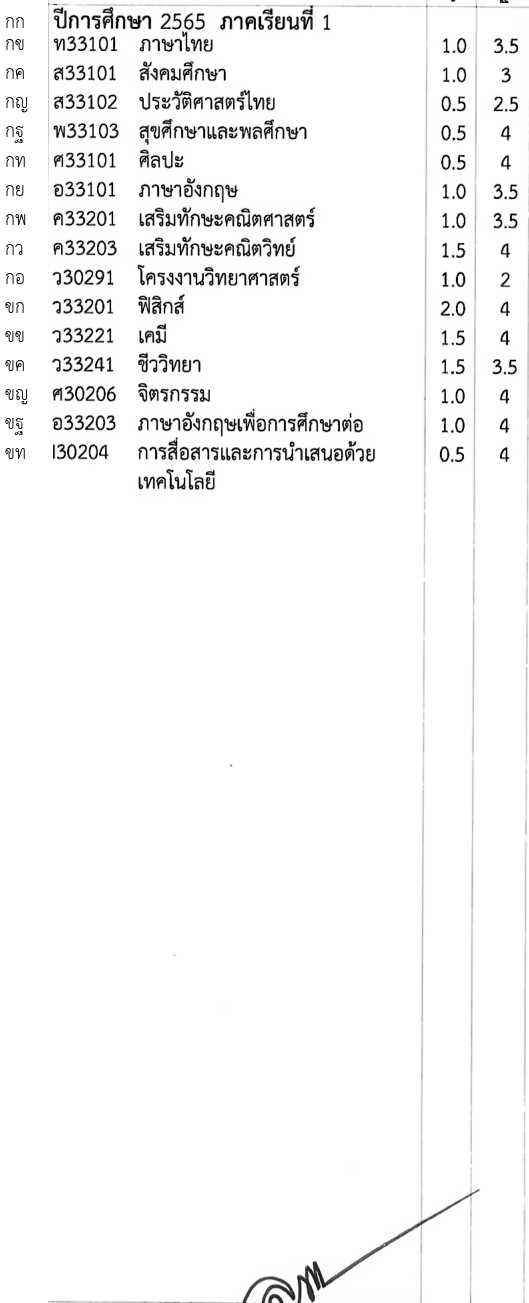

In [13]:
pf_sections[0]

In [14]:
import pandas as pd

In [15]:
d = pd.DataFrame({"A": [1, 2, 3, 4],
                  "B": [1, 2, 3, 4]
                  }
)

In [16]:
(d.A - d.A.shift(1)).abs().fillna(0)

0    0.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64